In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
edges = pd.read_csv('/Users/shady/Desktop/University/Big Data Analytics/edges_subgraph.csv')
nodes = pd.read_csv('/Users/shady/Desktop/University/Big Data Analytics/nodes_subgraph.csv')


In [4]:
# Quick check
print("Edges loaded:", len(edges))
print("Nodes loaded:", len(nodes))

Edges loaded: 1000
Nodes loaded: 453


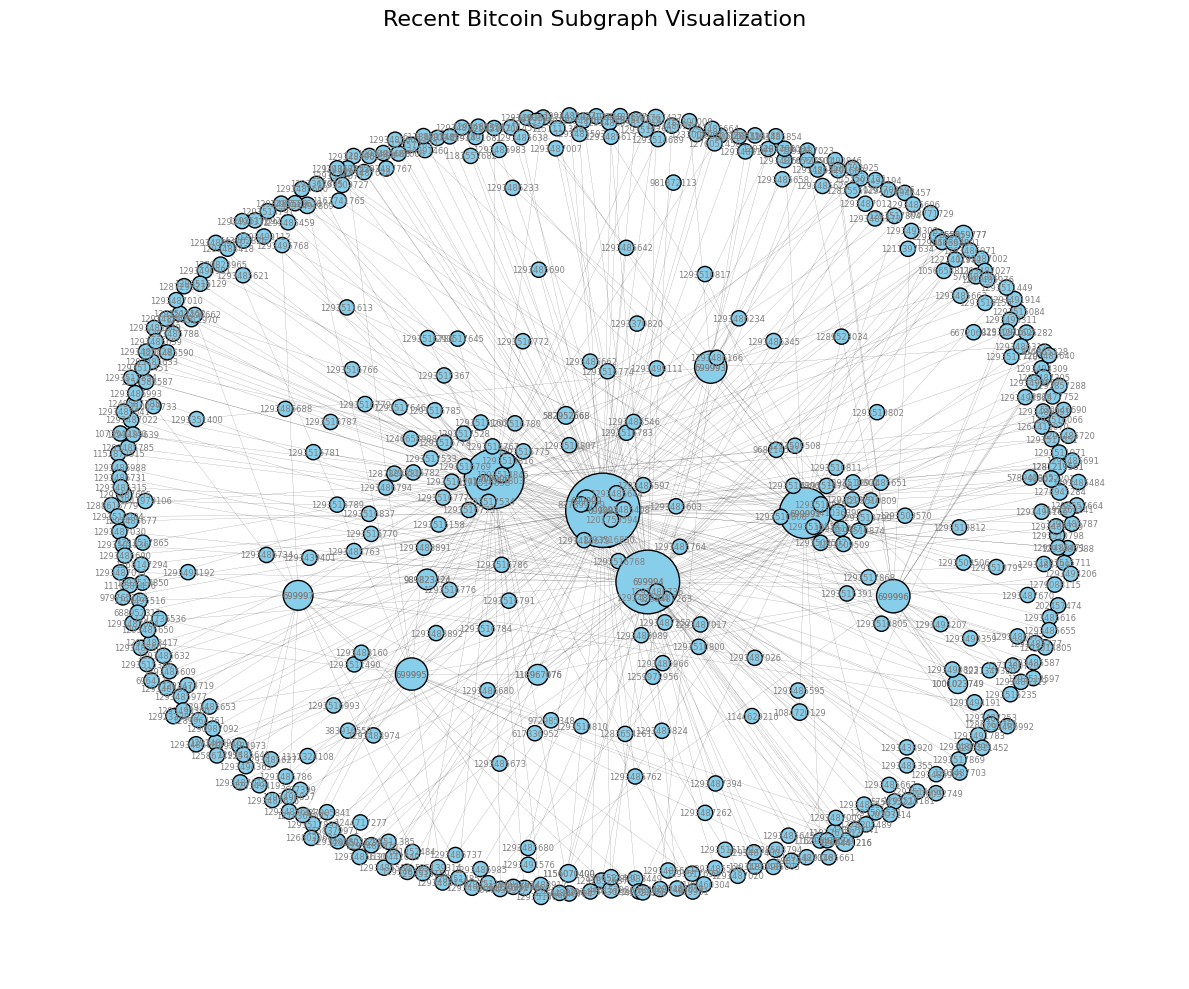

Nodes in CSV but not in graph: 1


In [13]:
G = nx.Graph()

# Add edges
for _, row in edges.iterrows():
    G.add_edge(row['col2'], row['col3'], weight=row['col6'])

# Add node attributes
for _, row in nodes.iterrows():
    node_id = row['col1']
    if node_id in G:
        G.nodes[node_id].update(row.to_dict())

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=100, iterations=100)
node_sizes = [100 + 20 * G.degree(n) for n in G.nodes]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.1, edge_color='black', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=6, font_color='gray')

for node in G.nodes:
    if G.degree(node) >= 3:
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=6, font_color='gray')

plt.title("Recent Bitcoin Subgraph Visualization", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

csv_node_ids = set(nodes['col1'])
graph_node_ids = set(G.nodes)

missing = csv_node_ids - graph_node_ids
print("Nodes in CSV but not in graph:", len(missing))


Nodes in CSV but not in graph: 1
